<h2>1. Familiarising with the Data</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_csv("train.csv")

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/415986326.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [5]:
train.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

<h2> 2. Data Cleaning

In [7]:
cols_to_keep = [
    'id', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
    'lease_commence_date', 'resale_price', 'Tranc_YearMonth',
    'price_per_sqft', 'hdb_age', 'year_completed', 'Latitude', 'Longitude',
    'Mall_Nearest_Distance', 'Mall_Within_1km',
    'Hawker_Nearest_Distance', 'Hawker_Within_500m',
    'mrt_nearest_distance', 'bus_interchange', 'pri_sch_nearest_distance', 'mid_storey'
]

In [8]:
test = pd.read_csv('test.csv', index_col = 'id')

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/1141781791.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test.csv', index_col = 'id')


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 114982 to 146210
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tranc_YearMonth            16737 non-null  object 
 1   town                       16737 non-null  object 
 2   flat_type                  16737 non-null  object 
 3   block                      16737 non-null  object 
 4   street_name                16737 non-null  object 
 5   storey_range               16737 non-null  object 
 6   floor_area_sqm             16737 non-null  float64
 7   flat_model                 16737 non-null  object 
 8   lease_commence_date        16737 non-null  int64  
 9   Tranc_Year                 16737 non-null  int64  
 10  Tranc_Month                16737 non-null  int64  
 11  mid_storey                 16737 non-null  int64  
 12  lower                      16737 non-null  int64  
 13  upper                      16737 non-null  in

In [10]:
#drop all the columns that we are not using
train = train[cols_to_keep]

In [11]:
#convert date columns to date_time

train['Tranc_YearMonth'] = pd.to_datetime(train['Tranc_YearMonth'])
test['Tranc_YearMonth'] = pd.to_datetime(test['Tranc_YearMonth'])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        150634 non-null  int64         
 1   town                      150634 non-null  object        
 2   flat_type                 150634 non-null  object        
 3   floor_area_sqm            150634 non-null  float64       
 4   flat_model                150634 non-null  object        
 5   lease_commence_date       150634 non-null  int64         
 6   resale_price              150634 non-null  float64       
 7   Tranc_YearMonth           150634 non-null  datetime64[ns]
 8   price_per_sqft            150634 non-null  float64       
 9   hdb_age                   150634 non-null  int64         
 10  year_completed            150634 non-null  int64         
 11  Latitude                  150634 non-null  float64       
 12  Lo

In [13]:
#Filling in the blank columns with 0
within_cols = [
    'Mall_Within_1km',
    'Hawker_Within_500m'
]

train[within_cols] = train[within_cols].fillna(0)
test[within_cols] = test[within_cols].fillna(0)

In [14]:
#convert all non-zero values to 0 and 1 for Hawker's and Mall
train['Hawker_Within_500m'] = (train['Hawker_Within_500m'] > 0).astype(int)
train['Mall_Within_1km'] = (train['Mall_Within_1km'] > 0).astype(int)
test['Hawker_Within_500m'] = (test['Hawker_Within_500m'] > 0).astype(int)
test['Mall_Within_1km'] = (test['Mall_Within_1km'] > 0).astype(int)

In [15]:
train['mrt_nearest_distance'].describe()

count    150634.000000
mean        765.007872
std         429.366039
min          21.971410
25%         458.266301
50%         682.621343
75%         975.734180
max        3544.504228
Name: mrt_nearest_distance, dtype: float64

In [16]:
train['pri_sch_nearest_distance'].describe()

count    150634.000000
mean        395.172974
std         234.760931
min          45.668324
25%         227.083163
50%         348.876691
75%         502.179385
max        3305.841039
Name: pri_sch_nearest_distance, dtype: float64

In [17]:
#Categorised mrt distance from the unit based on walkability
train['mrt_walkability'] = pd.cut(
    train['mrt_nearest_distance'],
    bins=[0, 500, 1000, 3545],
    labels=['Near', 'Average', 'Far'])
test['mrt_walkability'] = pd.cut(
    test['mrt_nearest_distance'],
    bins=[0, 500, 1000, 3545],
    labels=['Near', 'Average', 'Far'])

In [18]:
#Categorised distance from primary school based on primary school admission priority
train['sch_priority'] = pd.cut(
    train['pri_sch_nearest_distance'],
    bins=[0, 1000, 2000, 3306],
    labels=['High', 'Low', 'Nil'])
test['sch_priority'] = pd.cut(
    test['pri_sch_nearest_distance'],
    bins=[0, 1000, 2000, 3306],
    labels=['High', 'Low', 'Nil'])

In [19]:
#check for blanks
train.isnull().sum()

id                            0
town                          0
flat_type                     0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
Tranc_YearMonth               0
price_per_sqft                0
hdb_age                       0
year_completed                0
Latitude                      0
Longitude                     0
Mall_Nearest_Distance       829
Mall_Within_1km               0
Hawker_Nearest_Distance       0
Hawker_Within_500m            0
mrt_nearest_distance          0
bus_interchange               0
pri_sch_nearest_distance      0
mid_storey                    0
mrt_walkability               0
sch_priority                  0
dtype: int64

In [20]:
#We will fill in the blanks with the median value as there are big outliers in the dataset (up to 3496)
train['Mall_Nearest_Distance'].describe()

count    149805.000000
mean        664.239826
std         368.739209
min           0.000000
25%         391.473823
50%         602.818388
75%         868.818288
max        3496.402910
Name: Mall_Nearest_Distance, dtype: float64

In [21]:
#fill in the blanks
median_mall_distance = train['Mall_Nearest_Distance'].median()
train['Mall_Nearest_Distance'].fillna(median_mall_distance, inplace=True)
test['Mall_Nearest_Distance'].fillna(median_mall_distance, inplace=True)

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/1843900791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Mall_Nearest_Distance'].fillna(median_mall_distance, inplace=True)
/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/1843900791.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [22]:
#Created a new column to categorise units based on their region
town_to_region = {
    # CENTRAL
    'MARINE PARADE': 'CENTRAL',
    'BISHAN': 'CENTRAL',
    'BUKIT MERAH': 'CENTRAL',
    'GEYLANG': 'CENTRAL',
    'KALLANG/WHAMPOA': 'CENTRAL',
    'QUEENSTOWN': 'CENTRAL',
    'TOA PAYOH': 'CENTRAL',
    'ANG MO KIO': 'CENTRAL',
    'BUKIT TIMAH': 'CENTRAL',
    'CENTRAL AREA': 'CENTRAL',
    
    # WEST
    'JURONG EAST': 'WEST',
    'JURONG WEST': 'WEST',
    'BUKIT BATOK': 'WEST',
    'BUKIT PANJANG': 'WEST',
    'CHOA CHU KANG': 'WEST',
    'CLEMENTI': 'WEST',
    
    # NORTH
    'WOODLANDS': 'NORTH',
    'SEMBAWANG': 'NORTH',
    'YISHUN': 'NORTH',
    
    # NORTH-EAST
    'HOUGANG': 'NORTH-EAST',
    'SENGKANG': 'NORTH-EAST',
    'PUNGGOL': 'NORTH-EAST',
    'SERANGOON': 'NORTH-EAST',
    
    # EAST
    'BEDOK': 'EAST',
    'TAMPINES': 'EAST',
    'PASIR RIS': 'EAST'
}

In [23]:
train['Region'] = train['town'].map(town_to_region)
test['Region'] = test['town'].map(town_to_region)

In [24]:
#Creating a new category which groups the units into groups based on the floor which they are located on (Low (1-9), Mid (10-20), High (21+)
train['floor_category'] = pd.cut(
    train['mid_storey'],
    bins=[0, 9, 20, 100],
    labels=['Low (1-9)', 'Mid (10-20)', 'High (21+)']
)

In [25]:
# Created a new column for HDB age groups 'age_group' so that it is easier to categorise and visualise
train['age_group'] = pd.cut(
    train['hdb_age'],
    bins=[0, 10, 20, 30, 40, 100],
    labels=['0-10', '11-20', '21-30', '31-40', '40+']
)

In [26]:
#recategorise the flat type column into numerics
flat_type_map = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 7
}

train['flat_type_num'] = train['flat_type'].map(flat_type_map)
test['flat_type_num'] = test['flat_type'].map(flat_type_map)

In [27]:
train.head()

,id,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_YearMonth,price_per_sqft,hdb_age,...,mrt_nearest_distance,bus_interchange,pri_sch_nearest_distance,mid_storey,mrt_walkability,sch_priority,Region,floor_category,age_group,flat_type_num
0,88471,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016-05-01,701.928238,15,...,330.083069,0,1138.633422,11,Near,Low,CENTRAL,Mid (10-20),11-20,4
1,122598,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012-07-01,475.230826,34,...,903.659703,1,415.607357,8,Average,High,CENTRAL,Low (1-9),31-40,5
2,170897,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013-07-01,540.639580,24,...,1334.251197,1,498.849039,14,Far,High,WEST,Mid (10-20),21-30,6
3,86070,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012-04-01,496.080066,29,...,907.453484,1,389.515528,3,Average,High,CENTRAL,Low (1-9),21-30,4
4,153632,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017-12-01,333.552717,34,...,412.343032,0,401.200584,2,Near,High,NORTH,Low (1-9),31-40,4


<h2> 3. Exploratory Data Analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

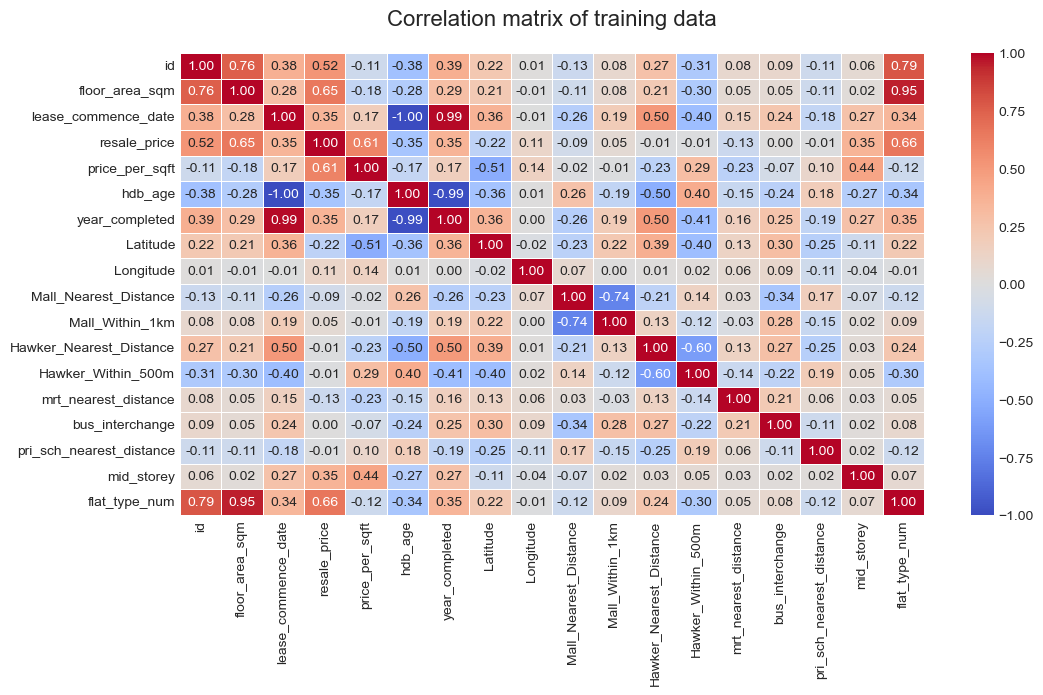

In [29]:
#Correlation matrix
sns.heatmap(
    train.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5,      
)

plt.title('Correlation matrix of training data', fontsize=16, pad=20)
plt.show()

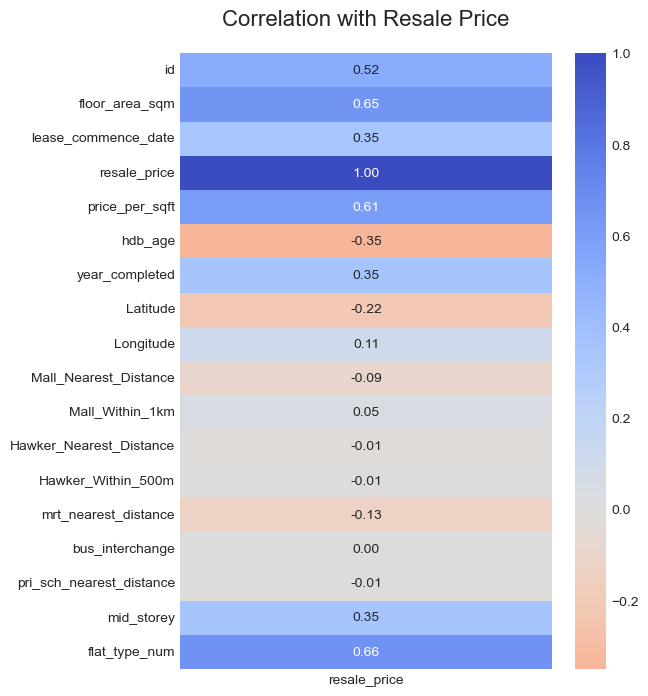

In [31]:
#Only the resale price column
numeric_df = train.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(6,8))
sns.heatmap(
    corr_matrix[['resale_price']], annot=True, fmt=".2f", cmap='coolwarm_r', center=0)     


plt.title('Correlation with Resale Price', fontsize=16, pad=20)
plt.show()

<h4> Based on this matrix, we find that there are 4 main factors which display a correlated relationship with resale_price: Mrt_nearest_distance, Mall_Nearest_Distance, mid_storey and hdb_age

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/911000983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  floor_stats = train.groupby('floor_category')['resale_price'].mean()


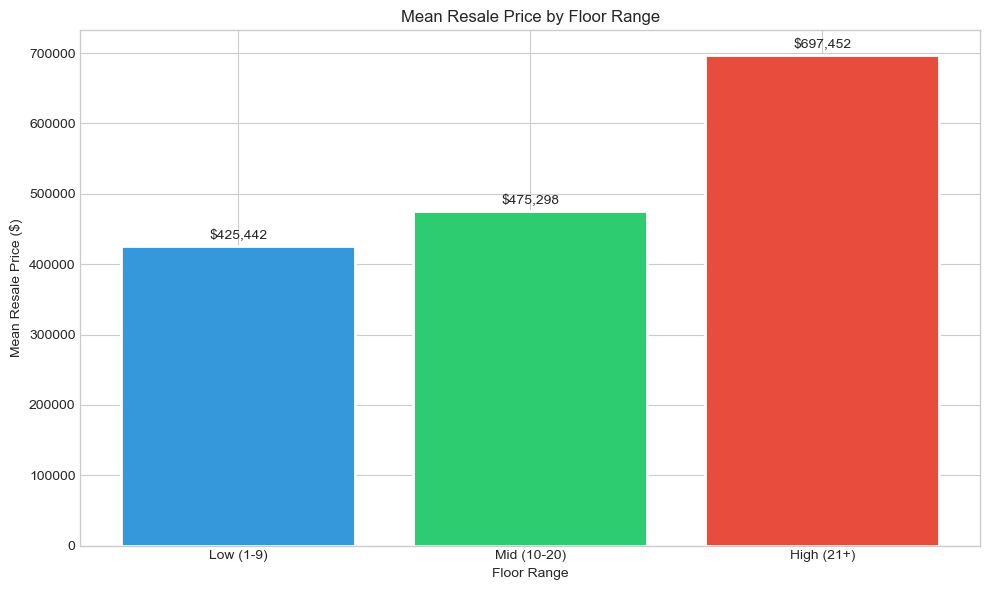

In [49]:
floor_stats = train.groupby('floor_category')['resale_price'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(floor_stats.index, floor_stats.values, color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='white', linewidth=2)
plt.xlabel('Floor Range')
plt.ylabel('Mean Resale Price ($)')
plt.title('Mean Resale Price by Floor Range')
plt.bar_label(bars, fmt='${:,.0f}', padding=3)
plt.tight_layout()
plt.show()

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/1361129645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = train.groupby('age_group')['resale_price'].mean()


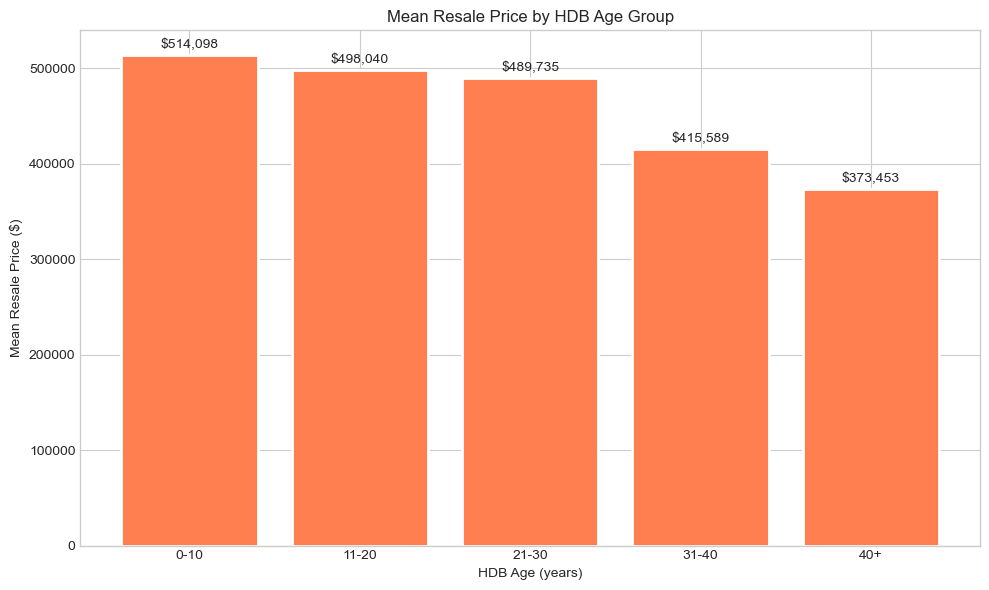

In [48]:
age_stats = train.groupby('age_group')['resale_price'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(age_stats.index, age_stats.values, color='coral', edgecolor='white', linewidth=2)
plt.xlabel('HDB Age (years)')
plt.ylabel('Mean Resale Price ($)')
plt.title('Mean Resale Price by HDB Age Group')
plt.bar_label(bars, fmt='${:,.0f}', padding=3)
plt.tight_layout()
plt.show()

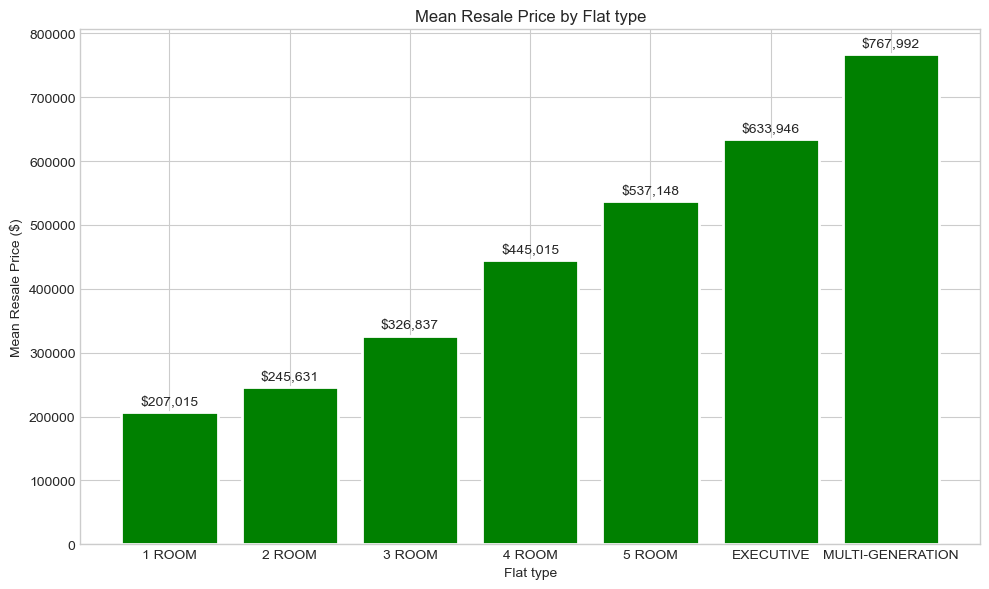

In [47]:
flat_stats = train.groupby('flat_type')['resale_price'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(flat_stats.index, flat_stats.values, color='green', edgecolor='white', linewidth=2)
plt.xlabel('Flat type')
plt.ylabel('Mean Resale Price ($)')
plt.title('Mean Resale Price by Flat type')
plt.bar_label(bars, fmt='${:,.0f}', padding=3)
plt.tight_layout()
plt.show()

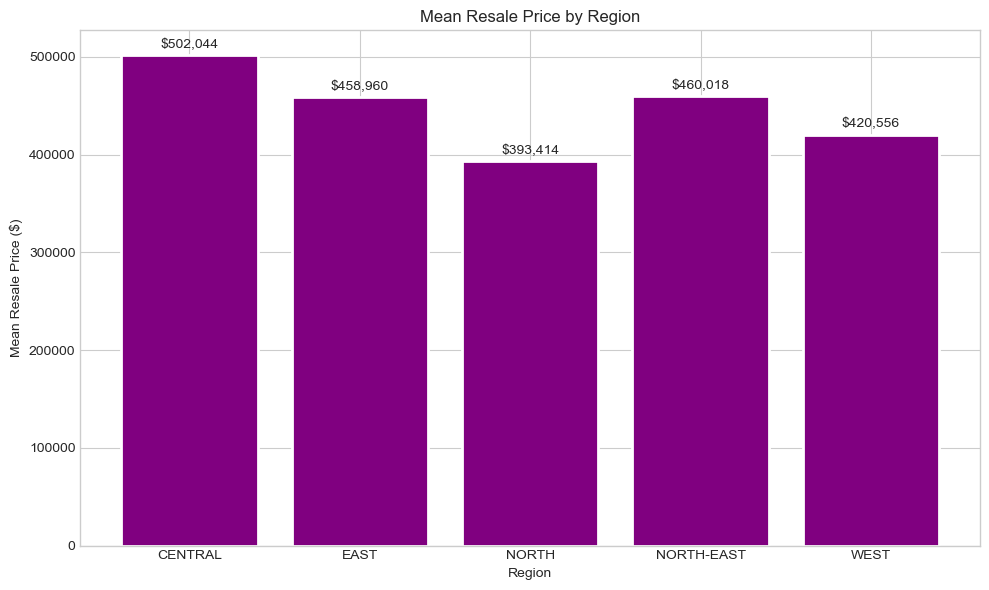

In [50]:
region_stats = train.groupby('Region')['resale_price'].mean()
plt.figure(figsize=(10,6))
bars = plt.bar(region_stats.index, region_stats.values, color='purple', edgecolor='white', linewidth=2)
plt.xlabel('Region')
plt.ylabel('Mean Resale Price ($)')
plt.title('Mean Resale Price by Region')
plt.bar_label(bars, fmt='${:,.0f}', padding=3)
plt.tight_layout()
plt.show()

/var/folders/r9/kfzbsbyd17vc6fh3csc86g740000gn/T/ipykernel_77978/3510777162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mrt_stats = train.groupby('mrt_walkability')['resale_price'].mean()


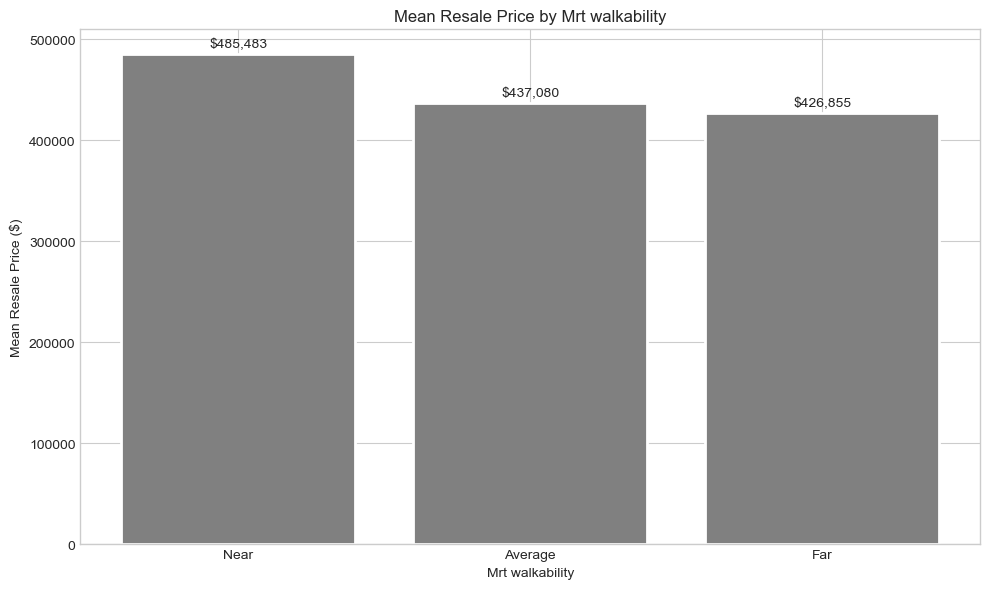

In [52]:
mrt_stats = train.groupby('mrt_walkability')['resale_price'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(mrt_stats.index, mrt_stats.values, color='grey', edgecolor='white', linewidth=2)
plt.xlabel('Mrt walkability')
plt.ylabel('Mean Resale Price ($)')
plt.title('Mean Resale Price by Mrt walkability')
plt.bar_label(bars, fmt='${:,.0f}', padding=3)
plt.tight_layout()
plt.show()

In [69]:
train.to_csv('train_cleaned.csv', index=False)

<h2> Best Linear Regression model - 0.78 r2 </h2>

In [70]:
#Selected 9 features for our main linear regression model which impacted price.
num_features = ['floor_area_sqm', 'hdb_age', 'mid_storey', 'flat_type_num', 'Mall_Nearest_Distance', 'mrt_nearest_distance', 'pri_sch_nearest_distance', 'Hawker_Nearest_Distance']
cat_features = ['Region']

In [72]:
#creating dummy variables for the region column to analyse it within the model
train = pd.get_dummies(train[num_features + ['Region', 'resale_price']], 
                                columns=['Region'], 
                                drop_first=True)

test = pd.get_dummies(test[num_features + ['Region']], 
                              columns=['Region'], 
                              drop_first=True)

In [73]:
test.head()

,floor_area_sqm,hdb_age,mid_storey,flat_type_num,Mall_Nearest_Distance,mrt_nearest_distance,pri_sch_nearest_distance,Hawker_Nearest_Distance,Region_EAST,Region_NORTH,Region_NORTH-EAST,Region_WEST
id,,,,,,,,,,,,
114982,84.0,34,8,4,877.431572,686.660434,426.467910,687.576779,False,True,False,False
95653,112.0,13,5,5,534.037705,169.478175,439.756851,2122.346226,False,False,False,True
40303,68.0,41,8,3,817.050453,694.220448,355.882207,152.287621,False,False,False,False
109506,97.0,42,2,4,1272.737194,1117.203587,929.744711,501.892158,False,True,False,False
100149,103.0,36,17,4,1070.963675,987.976010,309.926934,437.593564,False,False,False,True


In [74]:
X = train.drop('resale_price', axis=1)
y = train['resale_price']

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
lr_model = LinearRegression()

In [77]:
X.head()

,floor_area_sqm,hdb_age,mid_storey,flat_type_num,Mall_Nearest_Distance,mrt_nearest_distance,pri_sch_nearest_distance,Hawker_Nearest_Distance,Region_EAST,Region_NORTH,Region_NORTH-EAST,Region_WEST
0,90.0,15,11,4,1094.090418,330.083069,1138.633422,154.753357,False,False,False,False
1,130.0,34,8,5,866.941448,903.659703,415.607357,640.151925,False,False,False,False
2,144.0,24,14,6,1459.579948,1334.251197,498.849039,1762.082341,False,False,False,True
3,103.0,29,3,4,950.175199,907.453484,389.515528,726.215262,False,False,False,False
4,83.0,34,2,4,729.771895,412.343032,401.200584,1540.151439,False,True,False,False


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   floor_area_sqm            150634 non-null  float64
 1   hdb_age                   150634 non-null  int64  
 2   mid_storey                150634 non-null  int64  
 3   flat_type_num             150634 non-null  int64  
 4   Mall_Nearest_Distance     150634 non-null  float64
 5   mrt_nearest_distance      150634 non-null  float64
 6   pri_sch_nearest_distance  150634 non-null  float64
 7   Hawker_Nearest_Distance   150634 non-null  float64
 8   Region_EAST               150634 non-null  bool   
 9   Region_NORTH              150634 non-null  bool   
 10  Region_NORTH-EAST         150634 non-null  bool   
 11  Region_WEST               150634 non-null  bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 9.8 MB


In [79]:
test_features = ['floor_area_sqm', 'hdb_age', 'mid_storey', 'flat_type_num', 'Mall_Nearest_Distance', 'mrt_nearest_distance', 'pri_sch_nearest_distance', 'Hawker_Nearest_Distance', 'Region_EAST', 'Region_NORTH', 'Region_NORTH-EAST', 'Region_WEST']

In [80]:
X_test = test[test_features]
X_test.head()

,floor_area_sqm,hdb_age,mid_storey,flat_type_num,Mall_Nearest_Distance,mrt_nearest_distance,pri_sch_nearest_distance,Hawker_Nearest_Distance,Region_EAST,Region_NORTH,Region_NORTH-EAST,Region_WEST
id,,,,,,,,,,,,
114982,84.0,34,8,4,877.431572,686.660434,426.467910,687.576779,False,True,False,False
95653,112.0,13,5,5,534.037705,169.478175,439.756851,2122.346226,False,False,False,True
40303,68.0,41,8,3,817.050453,694.220448,355.882207,152.287621,False,False,False,False
109506,97.0,42,2,4,1272.737194,1117.203587,929.744711,501.892158,False,True,False,False
100149,103.0,36,17,4,1070.963675,987.976010,309.926934,437.593564,False,False,False,True


In [81]:
# 1. Initialize the model to always predict the mean
baseline = DummyRegressor(strategy="mean")

# 2. "Train" it (it just calculates the mean of y_train)
baseline.fit(X_train, y_train)

# 3. Predict and Evaluate
baseline_preds = baseline.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_preds))
baseline_r2 = r2_score(y_val, baseline_preds)

In [82]:
print(f"Baseline (Mean) RMSE: ${round(baseline_rmse, 2)}")
print(f"Baseline (Mean)  R²: {round(baseline_r2, 2)}")

Baseline (Mean) RMSE: $142801.32
Baseline (Mean)  R²: -0.0


In [83]:
# 1. Initialize the Linear Regression model
lr = LinearRegression()

# 2. Train the model on the training data
lr.fit(X_train[test_features], y_train)

# 3. Predict on the validation set
lr_preds = lr.predict(X_val[test_features])

# 4. Evaluate performance
lr_rmse = root_mean_squared_error(y_val, lr_preds)
lr_r2 = r2_score(y_val, lr_preds)

In [84]:
print(f"Linear Regression RMSE: ${round(lr_rmse,2)}")
print(f"Linear Regression R²: {round(lr_r2)}")

Linear Regression RMSE: $67608.68
Linear Regression R²: 1


In [85]:
cv_scores = cross_val_score(lr, X_train[test_features], y_train,
                         cv=5,
                         scoring='neg_root_mean_squared_error')

# The scores come back as negative numbers (e.g., -107464.53)
# We multiply by -1 to make them positive, readable RMSE values
cv_rmse_scores = -cv_scores

print(f"CV RMSE: ${round(cv_rmse_scores.mean(),2)} ")

CV RMSE: $67634.01 


In [86]:
cv_r2 = cross_val_score(lr, X_train[test_features], y_train,
                            cv=5,
                            scoring='r2')

# 2. Print the results
print(f'CV R²: {round(cv_r2.mean(),2)}')

CV R²: 0.78


In [87]:
X_test.head()

,floor_area_sqm,hdb_age,mid_storey,flat_type_num,Mall_Nearest_Distance,mrt_nearest_distance,pri_sch_nearest_distance,Hawker_Nearest_Distance,Region_EAST,Region_NORTH,Region_NORTH-EAST,Region_WEST
id,,,,,,,,,,,,
114982,84.0,34,8,4,877.431572,686.660434,426.467910,687.576779,False,True,False,False
95653,112.0,13,5,5,534.037705,169.478175,439.756851,2122.346226,False,False,False,True
40303,68.0,41,8,3,817.050453,694.220448,355.882207,152.287621,False,False,False,False
109506,97.0,42,2,4,1272.737194,1117.203587,929.744711,501.892158,False,True,False,False
100149,103.0,36,17,4,1070.963675,987.976010,309.926934,437.593564,False,False,False,True


In [88]:
X_test.index

Index([114982,  95653,  40303, 109506, 100149,   7610,  61101,  68167,  65701,
        56039,
       ...
        57281, 119341, 168552, 172892,  83890,  23347,  54003, 128921,  69352,
       146210],
      dtype='int64', name='id', length=16737)

In [89]:
# 🏆 FINAL PRODUCTION MODEL
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

In [90]:
# Retrain on ALL train data
final_model = LinearRegression()
final_model.fit(X_full[test_features], y_full)

print("✅ Production model trained on full dataset!")

✅ Production model trained on full dataset!


In [92]:
# Generate predictions for the Kaggle submission
# final model -> lr
final_model_pred = final_model.predict(X_test)

# Create the submission DataFrame
# Based on sample_sub_reg.csv, we need 'Id' and 'Predicted' columns
submission = pd.DataFrame({
    'Id': X_test.index,       # Use the original id column
    'Predicted': final_model_pred   # The prices your model just calculated
})

# 3. Save to CSV (index=False is mandatory for Kaggle!)
submission.to_csv('new_hdb_submission_2.csv', index=False)

print("✅ Submission file created successfully!")

✅ Submission file created successfully!


<h2> Ridge regression model - 0.77 r2</h2>

In [ ]:
# Selected 12 features which show relationship in the correlation matrix. Different columns selected than best model, but 
# similar 
numeric_features = [
'mid_storey', 'floor_area_sqm',
    'hdb_age', 'year_completed',
    'Latitude', 'Longitude',
    'Mall_Within_1km', 'Hawker_Nearest_Distance',
    'Hawker_Within_500m', 'mrt_nearest_distance',
    'bus_interchange', 'pri_sch_nearest_distance'
]

X_train_num = X_train[numeric_features]
X_val_num   = X_val[numeric_features]
X_test_num  = test[numeric_features]

In [ ]:
#
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train_num, y_train)

val_preds = model.predict(X_val_num)

In [ ]:
X_test = test[features]
X_test.head()

# apply transformation/feature creation on X_val
X_val = X_val[features]

In [ ]:
# Set up baseline model

# 1. Initialize the model to always predict the mean
baseline = DummyRegressor(strategy="mean")

# 2. "Train" it (it just calculates the mean of y_train)
baseline.fit(X_train, y_train)

# 3. Predict and Evaluate
baseline_preds = baseline.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_preds))
baseline_r2 = r2_score(y_val, baseline_preds)

In [ ]:
print(f"Baseline (Mean) RMSE: ${round(baseline_rmse, 2)}")
print(f"Baseline (Mean)  R²: {round(baseline_r2, 2)}")

In [ ]:
# Train our model/s using the basic level of validation or cv or gridsearchcv
# (thou not necessary if you only are only using linear regression)

# 1. Initialize the Linear Regression model
lr = LinearRegression()

# 2. Train the model on the training data
lr.fit(X_train[numeric_features], y_train)

# 3. Predict on the validation set
lr_preds = lr.predict(X_val[numeric_features])

# 4. Evaluate performance
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))
lr_r2 = r2_score(y_val, lr_preds)

In [ ]:
print(f"Linear Regression RMSE: ${round(lr_rmse,2)}")
print(f"Linear Regression R2: {lr_r2:.4f}")

In [ ]:
# You can also use cross validation

cv_scores = cross_val_score(lr, X_train[numeric_features], y_train,
                         cv=5,
                         scoring='neg_root_mean_squared_error')

# The scores come back as negative numbers (e.g., -107464.53)
# We multiply by -1 to make them positive, readable RMSE values
cv_rmse_scores = -cv_scores

print(f"CV RMSE: ${round(cv_rmse_scores.mean(),2)} ")

In [ ]:
cv_r2 = cross_val_score(lr, X_train[numeric_features], y_train,
                            cv=5,
                            scoring='r2')

# 2. Print the results
print(f'CV R²: {round(cv_r2.mean(),2)}')

In [ ]:
#Using Ridge regression to limit outliers.

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # alpha controls strength of regularisation

ridge.fit(X_train[numeric_features], y_train)

ridge_preds = ridge.predict(X_val[numeric_features])

ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_preds))
ridge_r2 = r2_score(y_val, ridge_preds)

print(f"Ridge RMSE: {ridge_rmse:.2f}")
print(f"Ridge R2: {ridge_r2:.4f}")

In [ ]:
alphas = [0.01, 0.1, 1, 10, 100, 1000]
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train[numeric_features], y_train)
    preds = ridge.predict(X_val[numeric_features])
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    print(f"alpha={a:>6} | RMSE={rmse:,.2f} | R2={r2:.4f}")

<h2>Older linear regression model 2, 7 features: 0.75 r2

In [ ]:
#Before settling on our final model, we chose 7 factors for our linear regression model. 
num_features_2 = ['floor_area_sqm', 'hdb_age', 'mid_storey', 'flat_type_num', 'Mall_Nearest_Distance', 'mrt_nearest_distance']
cat_features_2 = ['Region']

In [ ]:
#creating dummy variables for the region column to analyse it within the model
train = pd.get_dummies(train[num_features_2 + ['Region', 'resale_price']], 
                                columns=['Region'], 
                                drop_first=True)

test = pd.get_dummies(test[num_features_2 + ['Region']], 
                              columns=['Region'], 
                              drop_first=True)

In [ ]:
X = train.drop('resale_price', axis=1)
y = train['resale_price']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()

In [ ]:
features_2 = ['floor_area_sqm', 'hdb_age', 'mid_storey', 'flat_type_num', 'Mall_Nearest_Distance', 'mrt_nearest_distance', 'Region_EAST', 'Region_NORTH', 'Region_NORTH-EAST', 'Region_WEST']

In [ ]:
X_test = test[features_2]
X_test.head()

In [ ]:
# 1. Initialize the model to always predict the mean
baseline = DummyRegressor(strategy="mean")

# 2. "Train" it (it just calculates the mean of y_train)
baseline.fit(X_train, y_train)

# 3. Predict and Evaluate
baseline_preds = baseline.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_preds))
baseline_r2 = r2_score(y_val, baseline_preds)

In [ ]:
print(f"Baseline (Mean) RMSE: ${round(baseline_rmse, 2)}")
print(f"Baseline (Mean)  R²: {round(baseline_r2, 2)}")

In [ ]:
# 1. Initialize the Linear Regression model
lr = LinearRegression()

# 2. Train the model on the training data
lr.fit(X_train[features_2], y_train)

# 3. Predict on the validation set
lr_preds = lr.predict(X_val[features_2])

# 4. Evaluate performance
lr_rmse = root_mean_squared_error(y_val, lr_preds)
lr_r2 = r2_score(y_val, lr_preds)

In [ ]:
print(f"Linear Regression RMSE: ${round(lr_rmse,2)}")
print(f"Linear Regression R²: {round(lr_r2)}")

In [ ]:
cv_scores = cross_val_score(lr, X_train[features_2], y_train,
                         cv=5,
                         scoring='neg_root_mean_squared_error')

# The scores come back as negative numbers (e.g., -107464.53)
# We multiply by -1 to make them positive, readable RMSE values
cv_rmse_scores = -cv_scores

print(f"CV RMSE: ${round(cv_rmse_scores.mean(),2)} ")

In [ ]:
cv_r2 = cross_val_score(lr, X_train[features_2], y_train,
                            cv=5,
                            scoring='r2')

# 2. Print the results
print(f'CV R²: {round(cv_r2.mean(),2)}')

In [ ]:
# 🏆 FINAL PRODUCTION MODEL
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

In [ ]:
# Retrain on ALL train data
final_model = LinearRegression()
final_model.fit(X_full[features_2], y_full)

print("✅ Production model trained on full dataset!")

In [ ]:
# Generate predictions for the Kaggle submission
# final model -> lr
final_model_pred = final_model.predict(X_test)

# Create the submission DataFrame
# Based on sample_sub_reg.csv, we need 'Id' and 'Predicted' columns
submission = pd.DataFrame({
    'Id': X_test.index,       # Use the original id column
    'Predicted': final_model_pred   # The prices your model just calculated
})

# 3. Save to CSV (index=False is mandatory for Kaggle!)
submission.to_csv('hdb_submission_old.csv', index=False)

print("✅ Submission file created successfully!")

<h2>First linear regression model, 4 features: 0.23 r2

In [ ]:
#We only selected 4 factors for our first linear regression model based on the correlation matrix. 
#We did not select floor_area_sqm as we initially felt that the correlation was too 'obvious'. 
#And we wanted to explore how the other factors influenced the predictions.
features_1 = ['mrt_nearest_distance',
    'mid_storey',
    'hdb_age',
    'Mall_Nearest_Distance'
]

In [ ]:
X = train.drop('resale_price', axis=1)
y = train['resale_price']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()

In [ ]:
X_test = test[features_1]
X_test.head()

In [ ]:
# 1. Initialize the model to always predict the mean
baseline = DummyRegressor(strategy="mean")

# 2. "Train" it (it just calculates the mean of y_train)
baseline.fit(X_train, y_train)

# 3. Predict and Evaluate
baseline_preds = baseline.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_preds))
baseline_r2 = r2_score(y_val, baseline_preds)

In [ ]:
print(f"Baseline (Mean) RMSE: ${round(baseline_rmse, 2)}")
print(f"Baseline (Mean)  R²: {round(baseline_r2, 2)}")

In [ ]:
# 1. Initialize the Linear Regression model
lr = LinearRegression()

# 2. Train the model on the training data
lr.fit(X_train[features_1], y_train)

# 3. Predict on the validation set
lr_preds = lr.predict(X_val[features_1])

# 4. Evaluate performance
lr_rmse = root_mean_squared_error(y_val, lr_preds)
lr_r2 = r2_score(y_val, lr_preds)

In [ ]:
print(f"Linear Regression RMSE: ${round(lr_rmse,2)}")
print(f"Linear Regression R²: {round(lr_r2)}")

In [ ]:
cv_scores = cross_val_score(lr, X_train[features_1], y_train,
                         cv=5,
                         scoring='neg_root_mean_squared_error')

# The scores come back as negative numbers (e.g., -107464.53)
# We multiply by -1 to make them positive, readable RMSE values
cv_rmse_scores = -cv_scores

print(f"CV RMSE: ${round(cv_rmse_scores.mean(),2)} ")

In [ ]:
cv_r2 = cross_val_score(lr, X_train[features_1], y_train,
                            cv=5,
                            scoring='r2')

# 2. Print the results
print(f'CV R²: {round(cv_r2.mean(),2)}')

In [ ]:
# 🏆 FINAL PRODUCTION MODEL
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

In [ ]:
# Retrain on ALL train data
final_model = LinearRegression()
final_model.fit(X_full[features_1], y_full)

print("✅ Production model trained on full dataset!")

In [ ]:
# Generate predictions for the Kaggle submission
# final model -> lr
final_model_pred = final_model.predict(X_test)

# Create the submission DataFrame
# Based on sample_sub_reg.csv, we need 'Id' and 'Predicted' columns
submission = pd.DataFrame({
    'Id': X_test.index,       # Use the original id column
    'Predicted': final_model_pred   # The prices your model just calculated
})

# 3. Save to CSV (index=False is mandatory for Kaggle!)
submission.to_csv('hdb_submission_first.csv', index=False)

print("✅ Submission file created successfully!")